# 1er examen parcial

### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

#### 20 de junio de 2025

Alan Badillo Salas

### **Ejercicio 1. (20 puntos)**

Se tiene un conjunto de datos $X = [x_1, x_2, \dots, x_n]$. El proceso de estandarización **min-max** transforma cada valor $x_i$ al rango $[0, 1]$ mediante:

$$
z_i = \frac{x_i - \min(X)}{\max(X) - \min(X)}
$$

Una vez estandarizados, definimos el siguiente **índice de dispersión normalizado (IDN)**:

$$
\text{IDN}(X) = \frac{1}{n} \sum_{i=1}^n \left( z_i - \bar{z} \right)^2
$$

donde $\bar{z}$ es el promedio del vector estandarizado $Z_X$.



 i) Implementa una función que:

- Estandarice un vector $X$ usando la fórmula min-max.
- Calcule el valor de $\text{IDN}(X)$.


ii) Usa tu función para calcular $\text{IDN}(X)$ para:

$$
X = [12.4, 8.1, 15.7, 9.3, 14.8, 10.2, 11.6]
$$



iii) Compara el valor de $\text{IDN}(X)$ con la **varianza normalizada** calculada directamente con `np.var()` en Python. ¿Coinciden los valores?



---

In [76]:
def estandarizar_minmax(x):
    z = []
    xmin = min(x)
    xmax = max(x)
    for xi in x:
        zi = (xi - xmin) / (xmax - xmin)
        z.append(zi)
    return z

def idn(z):
    zp = sum(z) / len(z)
    w = []
    for zi in z:
        wi = (zi - zp) ** 2
        w.append(wi)
    wp = sum(w) / len(w)
    return wp

In [77]:
x = [12.4, 8.1, 15.7, 9.3, 14.8, 10.2, 11.6]

x

[12.4, 8.1, 15.7, 9.3, 14.8, 10.2, 11.6]

In [78]:
z = estandarizar_minmax(x)

z

[0.5657894736842106,
 0.0,
 1.0,
 0.15789473684210542,
 0.8815789473684212,
 0.2763157894736842,
 0.46052631578947373]

In [79]:
idn(z)

0.11642828876703037

In [80]:
import numpy

numpy.var(x)

np.float64(6.724897959183674)

La diferencia entre $IDN(X)$ y $Var(X)$ es alta

### **Ejercicio 2. (20 puntos)**

Se tiene la siguiente relación entre las variables $x$, $y$ y $z$:

$$\sin(x+y) = \tan (\frac{e^{\cos(x+y)}-\ln(z)}{2}).$$

   Visualice la función $z=f(x,y)$ en el dominio $[-10,10]\times[-10,10]$, en el caso de que $x+y\leq \frac{1}{2}$, entonces $z=20$. Para este ejercicio evalue la función en una malla de 500 puntos en cada dirección. 

---

In [81]:
import numpy

x = numpy.linspace(-10, 10, 500)
y = numpy.linspace(-10, 10, 500)

X, Y = numpy.meshgrid(x, y)

X.shape, Y.shape

((500, 500), (500, 500))

Para calcular z tenemos que despejar la variable:

$$
e^{cos(x + y)} - ln(z) = 2 \cdot tan^{-1}(sin(x + y))
$$

$$
ln(z) = e^{cos(x + y)} - 2 \cdot tan^{-1}(sin(x + y))
$$

$$
z = e^{e^{cos(x + y)} - 2 \cdot tan^{-1}(sin(x + y))}
$$

In [82]:
U = X + Y

Z = U * 0

Z = (U <= 0.5) * 20 + (U > 0.5) * numpy.exp(numpy.exp(numpy.cos(U)) - 2 * numpy.atan(numpy.sin(U)))

Z

array([[20.        , 20.        , 20.        , ..., 20.        ,
        20.        , 20.        ],
       [20.        , 20.        , 20.        , ..., 20.        ,
        20.        , 20.        ],
       [20.        , 20.        , 20.        , ..., 20.        ,
        20.        , 20.        ],
       ...,
       [20.        , 20.        , 20.        , ...,  1.40224539,
         1.29109402,  1.1919243 ],
       [20.        , 20.        , 20.        , ...,  1.29109402,
         1.1919243 ,  1.10341173],
       [20.        , 20.        , 20.        , ...,  1.1919243 ,
         1.10341173,  1.02438041]])

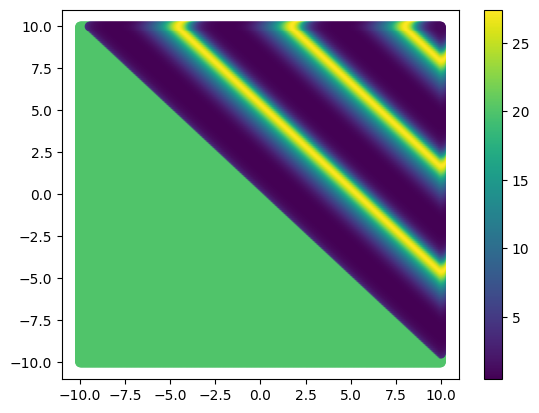

In [83]:
import matplotlib.pyplot as pyplot

pyplot.scatter(X, Y, c=Z)
pyplot.colorbar()

### **Ejercicio 3. (20 puntos)** 

Utilice los datos de los nacimientos por estado del 2020 al 2022 del repositorio en Github y realice lo siguiente:

a) Obtenga un Dataframe que tenga como columnas el número de nacimientos de mujeres, el número de nacimientos de hombres y el número total de nacimientos por año durante el 2020 al 2022. Obtenga una gráfica de cada categoría.

b) Agregue a los datos de nacimientos del 2020 la columna de población por estado y la tasa de nacimientos por cada mil habitantes. Gráfique la tasa de nacimientos por estado.

---

In [84]:
import pandas

nacimientos = []

for anio in [2020, 2021, 2022]:
    nacimientos_anio = pandas.read_csv(f"nacimientos_{anio}.csv")
    nacimientos_anio["Año"] = anio
    nacimientos.append(nacimientos_anio)

nacimientos_2020_2022 = pandas.concat(nacimientos)

nacimientos_2020_2022

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Año
0,Aguascalientes,AG,Noreste,9966,10404,0,20370,2020
1,Baja California,BC,Noroeste,23539,24406,0,47945,2020
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081,2020
3,Campeche,CM,Sureste,5275,5454,0,10729,2020
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815,2020
...,...,...,...,...,...,...,...,...
27,Tamaulipas,TM,Noreste,23177,24110,0,47287,2022
28,Tlaxcala,TL,Centro-Sur,9653,9964,1,19618,2022
29,Veracruz,VE,Sureste,53782,55329,0,109111,2022
30,Yucatan,YU,Sureste,13829,14103,0,27932,2022


In [85]:
reporte1 = nacimientos_2020_2022[["Año", "Mujeres", "Hombres", "Total"]].copy()

reporte1

,Año,Mujeres,Hombres,Total
0,2020,9966,10404,20370
1,2020,23539,24406,47945
2,2020,4982,5099,10081
3,2020,5275,5454,10729
4,2020,22594,23221,45815
...,...,...,...,...
27,2022,23177,24110,47287
28,2022,9653,9964,19618
29,2022,53782,55329,109111
30,2022,13829,14103,27932


In [86]:
reporte1.groupby("Año").sum()

,Mujeres,Hombres,Total
Año,,,
2020,798452,827072,1625527
2021,938302,965088,1903393
2022,924579,956137,1880718


In [87]:
reporte1.sum()

Año         194016
Mujeres    2661333
Hombres    2748297
Total      5409638
dtype: int64

Entre el 2020 y 2022 nacieron $2,661,333$ mujeres y $2,748,297$ hombres, y en total $5,409,638$ hombres, mujeres y no especificados.

<Axes: xlabel='Año'>

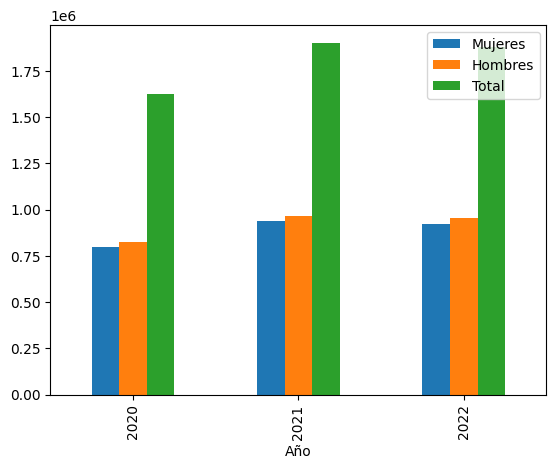

In [88]:
reporte1.groupby("Año").sum().plot.bar()

In [89]:
nacimientos_2020 = nacimientos[0]

nacimientos_2020

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Año
0,Aguascalientes,AG,Noreste,9966,10404,0,20370,2020
1,Baja California,BC,Noroeste,23539,24406,0,47945,2020
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081,2020
3,Campeche,CM,Sureste,5275,5454,0,10729,2020
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815,2020
5,Colima,CL,Occidente,4325,4623,0,8948,2020
6,Chiapas,CS,Sureste,47962,50136,0,98098,2020
7,Chihuahua,CH,Noroeste,23436,24659,0,48095,2020
8,CDMX,CX,Centro-Sur,32218,33485,0,65703,2020
9,Durango,DG,Noroeste,13713,14275,0,27988,2020


In [90]:
poblacion = pandas.read_csv("poblacion.csv")

poblacion

,Estado,Regiones,H_1990,M_1990,H_2000,M_2000,H_2010,M_2010,H_2020,M_2020
0,Aguascalientes,Noreste,350218,369441,456533,487752,576638,608358,696683,728924
1,Baja California,Noroeste,832090,828765,1252581,1234786,1591610,1563460,1900589,1868431
2,Baja California Sur,Noroeste,161833,155931,216250,207791,325433,311593,405879,392568
3,Campeche,Sureste,268772,266413,344334,346355,407721,414720,456939,471424
4,Coahuila de Zaragoza,Noreste,979097,993243,1140195,1157875,1364197,1384194,1563669,1583102
5,Colima,Occidente,212543,215967,268192,274435,322790,327765,360622,370769
6,Chiapas,Sureste,1604773,1605723,1941880,1979012,2352807,2443773,2705947,2837881
7,Chihuahua,Noroeste,1213302,1228571,1519972,1532935,1692545,1713920,1853822,1888047
8,CDMX,Centro-Sur,3939911,4295833,4110485,4494754,4233783,4617297,4404927,4805017
9,Durango,Noroeste,664766,684612,709521,739140,803890,829044,904866,927784


Verifiquemos que los estados estén en el mismo orden (sean los mismos)

In [91]:
(nacimientos_2020["Estado"] != poblacion["Estado"]).sum()

np.int64(0)

In [92]:
nacimientos_2020["Población Mujeres"] = poblacion["M_2020"]
nacimientos_2020["Población Hombres"] = poblacion["H_2020"]

nacimientos_2020["Población"] = nacimientos_2020["Población Mujeres"] + nacimientos_2020["Población Hombres"]

nacimientos_2020

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Año,Población Mujeres,Población Hombres,Población
0,Aguascalientes,AG,Noreste,9966,10404,0,20370,2020,728924,696683,1425607
1,Baja California,BC,Noroeste,23539,24406,0,47945,2020,1868431,1900589,3769020
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081,2020,392568,405879,798447
3,Campeche,CM,Sureste,5275,5454,0,10729,2020,471424,456939,928363
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815,2020,1583102,1563669,3146771
5,Colima,CL,Occidente,4325,4623,0,8948,2020,370769,360622,731391
6,Chiapas,CS,Sureste,47962,50136,0,98098,2020,2837881,2705947,5543828
7,Chihuahua,CH,Noroeste,23436,24659,0,48095,2020,1888047,1853822,3741869
8,CDMX,CX,Centro-Sur,32218,33485,0,65703,2020,4805017,4404927,9209944
9,Durango,DG,Noroeste,13713,14275,0,27988,2020,927784,904866,1832650


In [93]:
nacimientos_2020["Tasa nacimientos"] = (nacimientos_2020["Total"] / nacimientos_2020["Población"]) * 1000

nacimientos_2020[["Estado", "Mujeres", "Hombres", "Total", "Población", "Tasa nacimientos"]]

,Estado,Mujeres,Hombres,Total,Población,Tasa nacimientos
0,Aguascalientes,9966,10404,20370,1425607,14.288650
1,Baja California,23539,24406,47945,3769020,12.720813
2,Baja California Sur,4982,5099,10081,798447,12.625760
3,Campeche,5275,5454,10729,928363,11.556902
4,Coahuila de Zaragoza,22594,23221,45815,3146771,14.559369
5,Colima,4325,4623,8948,731391,12.234222
6,Chiapas,47962,50136,98098,5543828,17.694993
7,Chihuahua,23436,24659,48095,3741869,12.853203
8,CDMX,32218,33485,65703,9209944,7.133920
9,Durango,13713,14275,27988,1832650,15.271874


Text(0, 0.5, 'Tasa de nacimientos por cada 1,000 habitantes')

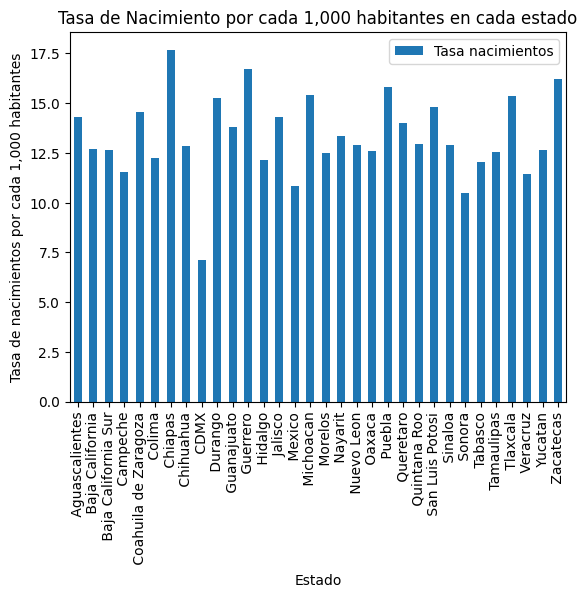

In [97]:
nacimientos_2020[["Estado", "Tasa nacimientos"]].plot.bar("Estado")
pyplot.title("Tasa de Nacimiento por cada 1,000 habitantes en cada estado")
pyplot.ylabel("Tasa de nacimientos por cada 1,000 habitantes")

### **Ejercicio 4. (20 puntos)**

Guarde en un Dataframe los datos de los precios de las acciones de Tesla (*tesla.csv* en Github).

El **retorno simple** mide el cambio porcentual entre el precio de un activo financiero en dos momentos consecutivos. Es útil para analizar la variación de precios, por ejemplo, el precio de cierre diario de una acción. Dado un precio de cierre $ P_t $ en el tiempo $ t $, el retorno simple se calcula como:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
$$

donde:

- $ r_t $: retorno simple en el tiempo $ t $,
- $ P_t $: precio de cierre en el tiempo $ t $,
- $ P_{t-1} $: precio de cierre en el tiempo anterior.


a) Agregue la columna correspondiente a la serie de **retornos simples** (utilice la función *.pct_change()*) y elimine la primera fila del *DataFrame*.

b) Grafique la serie de tiempo de los retornos simples y obtenga:
- El retorno simple más alto,
- El retorno simple más bajo,
- Las fechas en que ocurrieron.

c) Obtenga el histograma de frecuencia de la serie de retornos simples.  
¿Estos se distribuyen normalmente? Justifique su respuesta calculando el coeficiente de asimetría, kurtosis y haciendo la prueba de Shapiro–Wilk.

d) Genere las gráficas de caja por año de los precios de cierre.


---

In [122]:
import pandas

tesla = pandas.read_csv("tesla.csv", index_col=0, parse_dates=True)

tesla.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


In [123]:
r = tesla["Close"].pct_change().iloc[1:]

r.head()

Date
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
2020-01-09   -0.021945
Name: Close, dtype: float64

<Axes: xlabel='Date'>

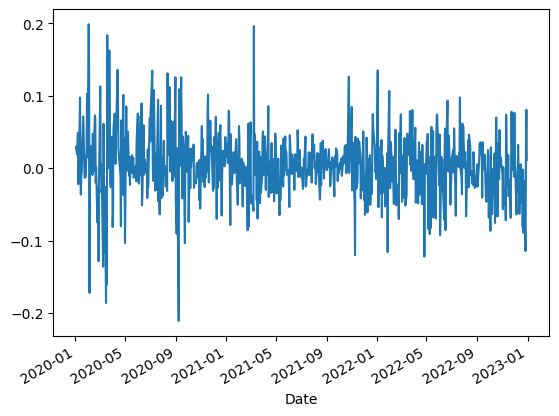

In [125]:
r.plot.line()

In [133]:
imin = r.argmin()
imax = r.argmax()

pandas.DataFrame([
    (r.index[imin], r.iloc[imin]),
    (r.index[imax], r.iloc[imax]),
], columns=["Fecha", "Retorno"], index=["Mínimo", "Máximo"])

,Fecha,Retorno
Mínimo,2020-09-08,-0.210628
Máximo,2020-02-03,0.198949


<Axes: ylabel='Density'>

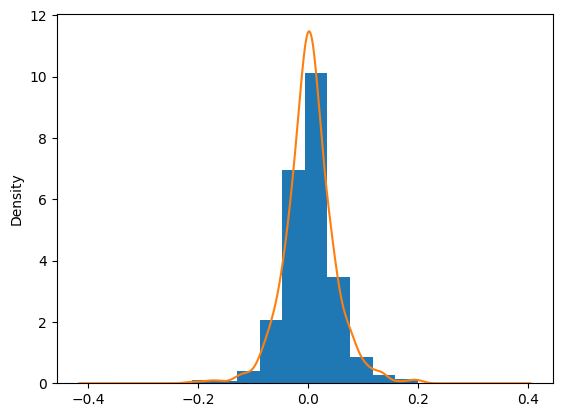

In [138]:
r.plot.hist(density=True)
r.plot.density()

Aparentemente se distribuye normal

**Asimetría**

$$
\eta = \frac{1}{n} \sum_{i = 1}^{n} \frac{(x_i - \overline{x}) ^ 3}{S^3}
$$

Tipo de sesgo:

* $\eta > 0$ - Sesgo positivo
* $\eta \approx 0$ - Casi insesgado
* $\eta < 0$ - Sesgo negativo

In [139]:
r.skew()

np.float64(0.08619747048670622)

Observamos que los datos son casi insegados

**Curtosis**

$$
\beta = \frac{1}{n} \sum_{i = 1}^{n} \frac{(x_i - \overline{x}) ^ 4}{S^4}
$$

Tipos de curtosis:

* **Leptokurtic** - Estrecha ($\beta > 0$)
* **Mesokurtic** - Normal ($\beta \approx 0$)
* **Platykurtic** - Oval ($\beta < 0$)

In [140]:
r.kurt()

np.float64(2.7456294768903464)

Observamos que la curtosis es del tipo leptocurtosis

**Prueba de Shapiro-Wilk**

1. $H_0$: La muestra proviene de una distribución normal, la aceptamos con $p \ge 0.05$
2. $H_1$: La muestra no proviene de una distribución normal, si $p < 0.05$

In [135]:
from scipy.stats import shapiro

r_value, p_value = shapiro(r)
print(f"r = {r_value:.4f} | p-value = {p_value:.10f}")

r = 0.9644 | p-value = 0.0000000000


Se rechaza la hipótesis nula $H_0$ dado que el valor-p es menor a $0.05$ 

### **Ejercicio 5. (20 puntos)**

Guarde en un *DataFrame* los datos de los 6 contaminantes principales de la ciudad de Puebla a partir del año 2016 (*contam_PUE_ugm3.csv* en GitHub). A continuación, realice lo siguiente:

a) Obtenga las gráficas de series de tiempo** de todos los contaminantes, los gráficos de caja, y calcule el número de datos atípicos de cada uno.

b) Realice una prueba de contraste de normalidad para los datos. Obtenga una matriz de correlación y un mapa de calor de los contaminantes utilizando el coeficiente de correlación apropiado.

c) Obtenga un *DataFrame* que muestre la correlación 2 a 2 entre los contaminantes.  
Grafique 3 diagramas de dispersión** entre los contaminantes que presentan mayor correlación, ya sea positiva o negativa.

d) Aplique el test de Mann-Kendall a todos los contaminantes y obtenga una gráfica con la línea de tendencia de cada uno (en caso de que exista).

e) Compruebe la existencia de tendencia mediante el método ITA (Innovative Trend Analysis).


In [142]:
import pandas

contam = pandas.read_csv("contam_PUE_ugm3.csv", index_col=0, parse_dates=True)

contam.head()

,O3,PM10,PM25,SO2,CO,NO2
Fecha,,,,,,
2016-01-01,0.028414,44.694444,28.097222,0.003244,1.763388,0.020635
2016-01-02,0.027376,31.527778,13.791667,0.003339,1.796858,0.022468
2016-01-03,0.032512,44.333333,20.430556,0.003551,1.845788,0.023123
2016-01-04,0.028332,24.990338,9.569444,0.003051,1.756417,0.020897
2016-01-05,0.026939,21.763889,10.638889,0.003296,1.782832,0.021215


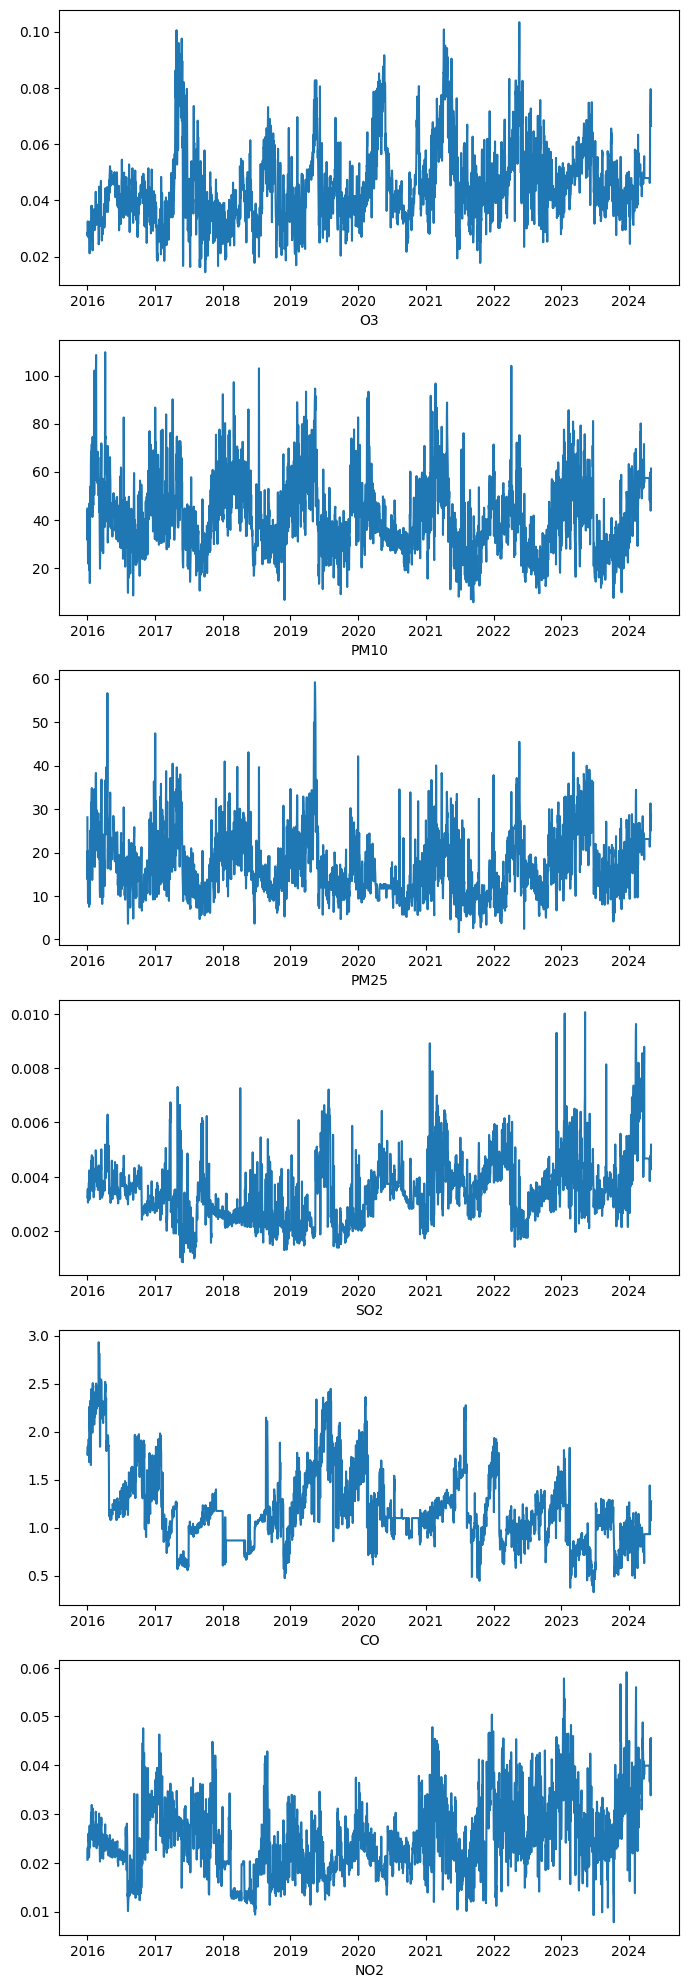

In [171]:
import matplotlib.pyplot as pyplot

figure, axis = pyplot.subplots(len(contam.columns), 1, figsize=(8, 25))

for i, column in enumerate(contam.columns):
    axis[i].plot(contam.index, contam[column])
    axis[i].set_xlabel(column)


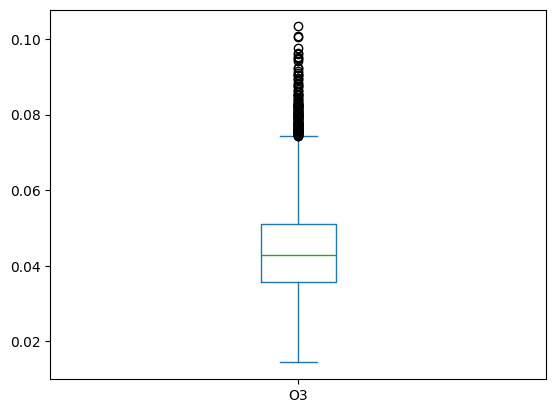

Q1 = 0.035606291228617096 | Q3 = 0.0510636588114753 | IQR = 0.015457367582858206
Puntos atípicos superiores: 136 / 3043
Puntos atípicos inferiores: 0 / 3043


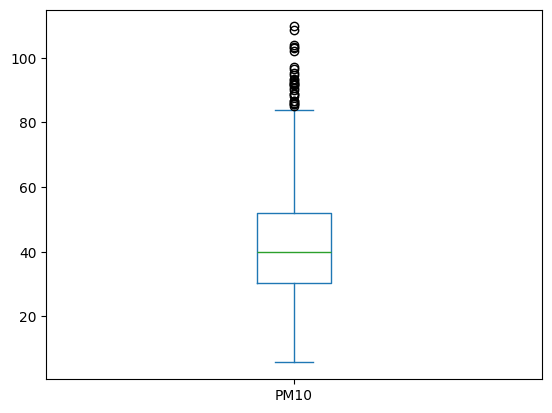

Q1 = 30.194444444444443 | Q3 = 51.951388888888886 | IQR = 21.756944444444443
Puntos atípicos superiores: 28 / 3043
Puntos atípicos inferiores: 0 / 3043


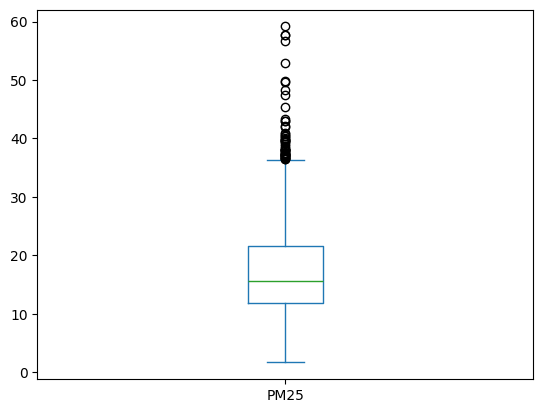

Q1 = 11.781840140535792 | Q3 = 21.65489130434783 | IQR = 9.87305116381204
Puntos atípicos superiores: 51 / 3043
Puntos atípicos inferiores: 0 / 3043


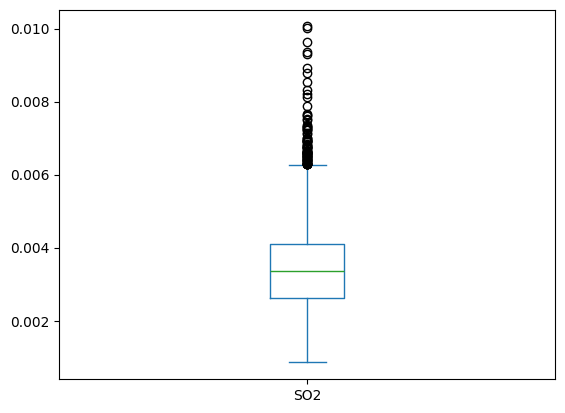

Q1 = 0.0026265850621353002 | Q3 = 0.00408715579763865 | IQR = 0.0014605707355033496
Puntos atípicos superiores: 82 / 3043
Puntos atípicos inferiores: 0 / 3043


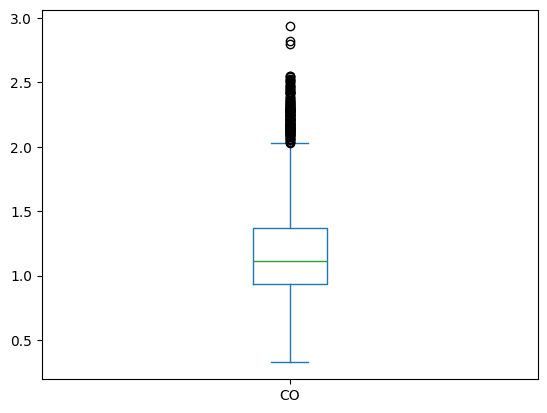

Q1 = 0.931934977471 | Q3 = 1.3703324225865208 | IQR = 0.4383974451155208
Puntos atípicos superiores: 145 / 3043
Puntos atípicos inferiores: 0 / 3043


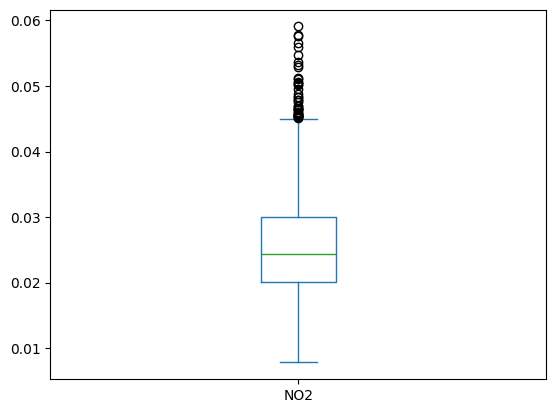

Q1 = 0.020078741888660948 | Q3 = 0.03005199112021835 | IQR = 0.009973249231557402
Puntos atípicos superiores: 41 / 3043
Puntos atípicos inferiores: 0 / 3043


In [161]:
for column in contam.columns:
    x = contam[column]
    
    x.plot.box()
    pyplot.show()
    
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    sup = Q3 + 1.5 * IQR
    inf = Q1 - 1.5 * IQR

    print(f"Q1 = {Q1} | Q3 = {Q3} | IQR = {IQR}")
    
    print(f"Puntos atípicos superiores: {x[x > sup].count()} / {x.count()}")
    print(f"Puntos atípicos inferiores: {x[x < inf].count()} / {x.count()}")

Verificamos la normalidad de cada columna usando la prueba de Shpairo-Wilk y si se acepta la hipótesis nula $H_0$ usaremos la correlación de Pearon y si se rechaza (no es normal) usaremos la correlación de Spearmann.

In [173]:
from scipy.stats import shapiro

for column in contam.columns:
    x = contam[column]

    r_value, p_value = shapiro(x)

    if p_value > 0.05:
        print(f"{column} se distribuye normal")
    else:
        print(f"{column} no se distribuye normal")

O3 no se distribuye normal
PM10 no se distribuye normal
PM25 no se distribuye normal
SO2 no se distribuye normal
CO no se distribuye normal
NO2 no se distribuye normal


Cómo los datos en general no se distribuyen normales, usaremos la correlación de Spermann

**Correlación de Spearman**

$$
\rho = 1 - \frac{6 \sum_{i = 1}^{n} d_i^2}{n \cdot (n^2 - 1)}
$$

* $d$ - Diferencia en el *rank* o posición en la pareja de observaciones, es decir, ordenados por el primer eje y ordenados por el segundo eje.
* $n$ - Observaciones

In [174]:
contam.corr(method="spearman")

,O3,PM10,PM25,SO2,CO,NO2
O3,1.000000,0.153624,0.222907,0.181364,-0.140142,0.152639
PM10,0.153624,1.000000,0.801181,0.184808,0.077874,0.295978
PM25,0.222907,0.801181,1.000000,0.144048,-0.010205,0.315740
SO2,0.181364,0.184808,0.144048,1.000000,0.133664,0.340807
CO,-0.140142,0.077874,-0.010205,0.133664,1.000000,-0.007370
NO2,0.152639,0.295978,0.315740,0.340807,-0.007370,1.000000


<Axes: >

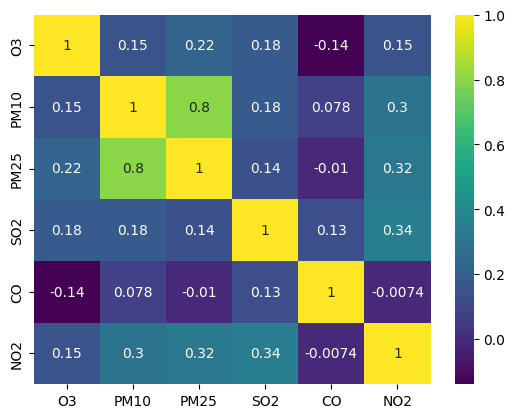

In [182]:
import seaborn

seaborn.heatmap(contam.corr(method="spearman"), cmap="viridis", annot=True)

In [186]:
import pingouin

pingouin.pairwise_corr(contam).sort_values(by="r", ascending=False).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
5,PM10,PM25,pearson,two-sided,3043,0.791,"[0.78, 0.8]",0.000,inf,1.000
13,SO2,NO2,pearson,two-sided,3043,0.399,"[0.37, 0.43]",0.000,7.14e+112,1.000
8,PM10,NO2,pearson,two-sided,3043,0.310,"[0.28, 0.34]",0.000,6.826e+64,1.000
11,PM25,NO2,pearson,two-sided,3043,0.301,"[0.27, 0.33]",0.000,1.47e+61,1.000
1,O3,PM25,pearson,two-sided,3043,0.250,"[0.22, 0.28]",0.000,5.914e+40,1.000
6,PM10,SO2,pearson,two-sided,3043,0.225,"[0.19, 0.26]",0.000,5.652e+32,1.000
9,PM25,SO2,pearson,two-sided,3043,0.178,"[0.14, 0.21]",0.000,4.521e+19,1.000
0,O3,PM10,pearson,two-sided,3043,0.169,"[0.13, 0.2]",0.000,3.238e+17,1.000
2,O3,SO2,pearson,two-sided,3043,0.163,"[0.13, 0.2]",0.000,1.074e+16,1.000
12,SO2,CO,pearson,two-sided,3043,0.128,"[0.09, 0.16]",0.000,1.751e+09,1.000


Observamos que *PM10* y *PM25* se correlacionan más positivamente y *CO* y *O3* se correlacionan más negativamente 

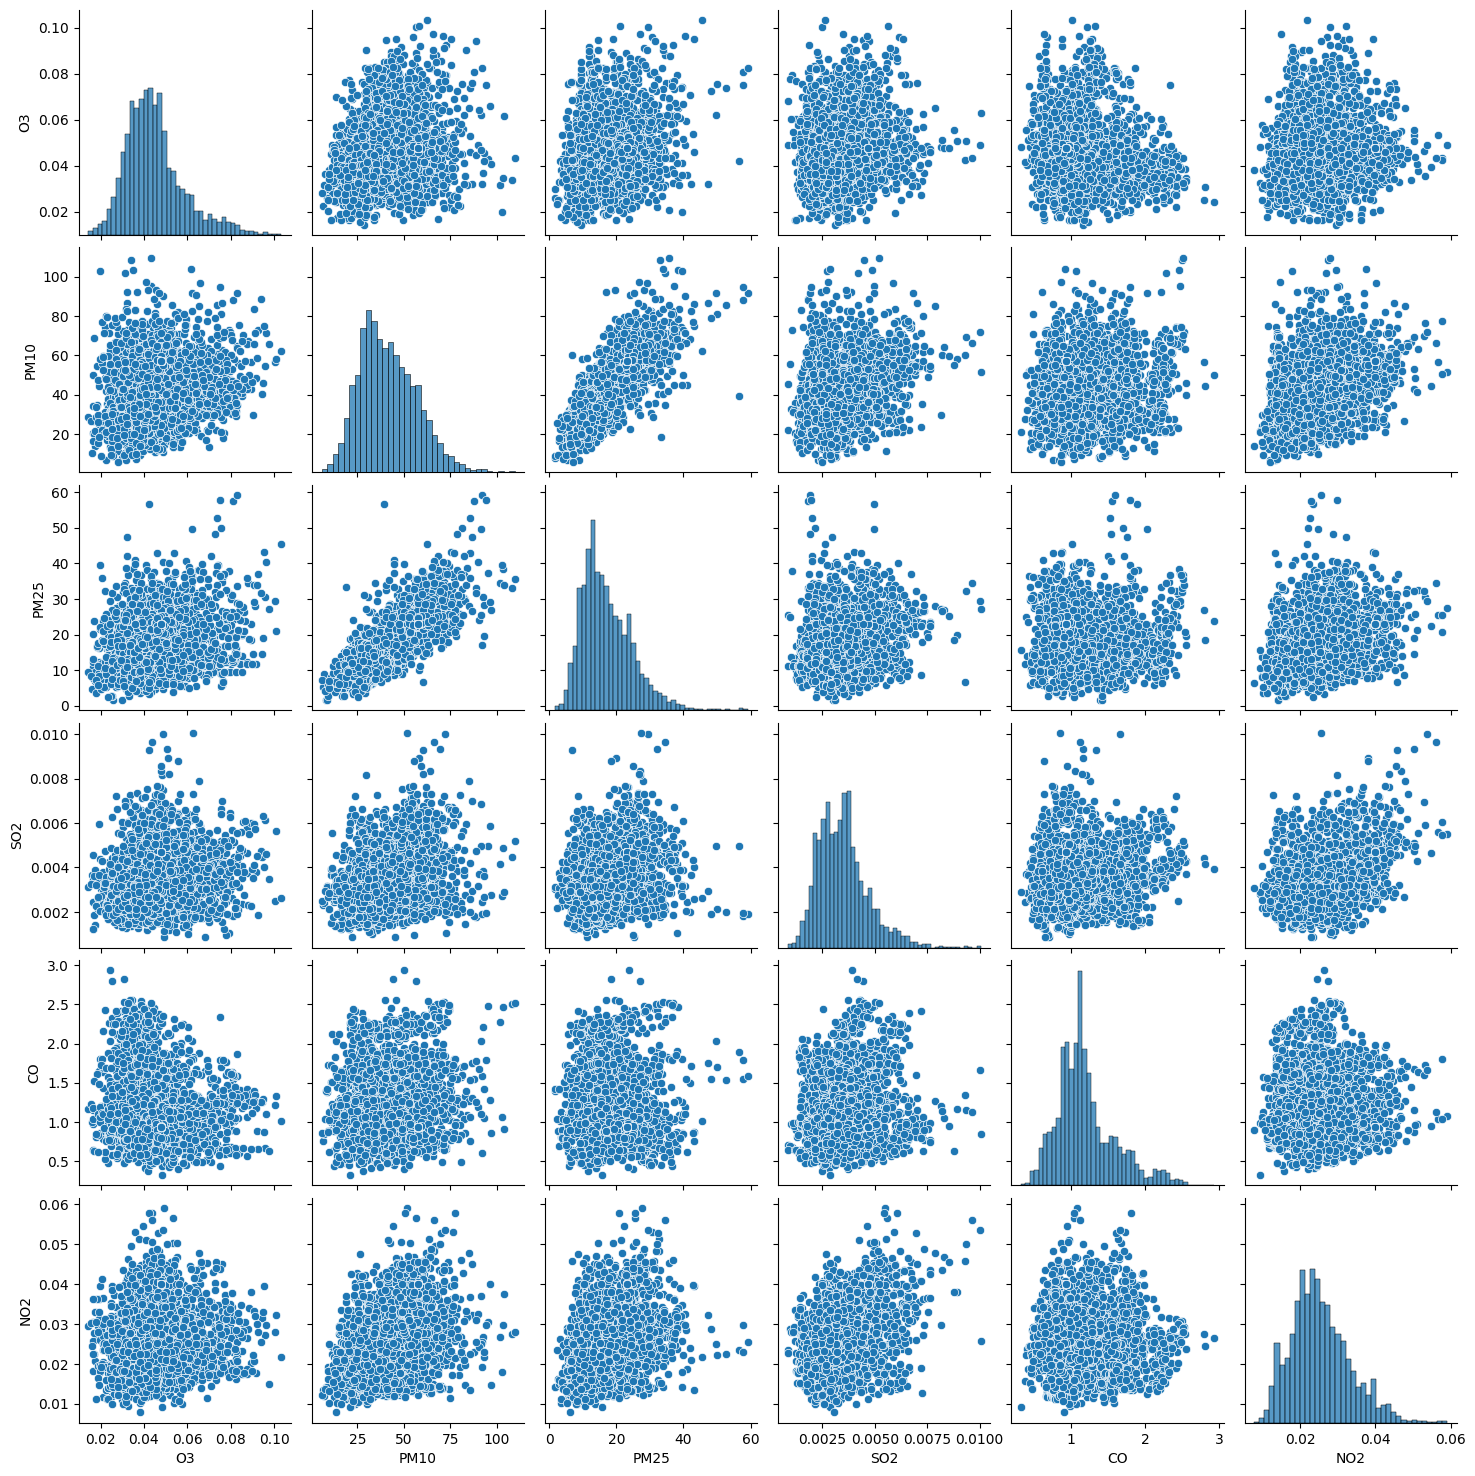

In [179]:
seaborn.pairplot(contam)

np.float64(0.8011807930223976)

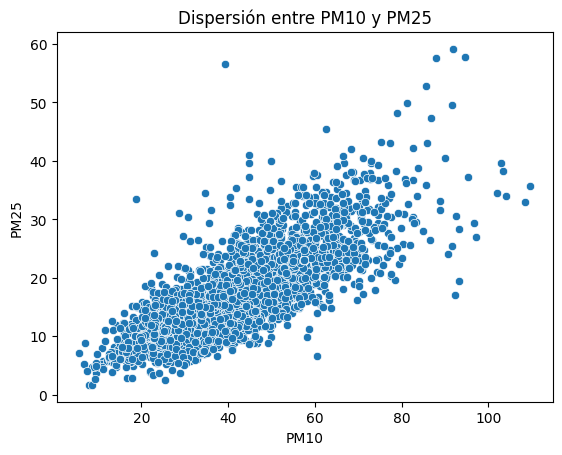

In [185]:
seaborn.scatterplot(contam, x="PM10", y="PM25")
pyplot.title("Dispersión entre PM10 y PM25")
contam["PM10"].corr(contam["PM25"], method="spearman")

np.float64(0.3408070510798253)

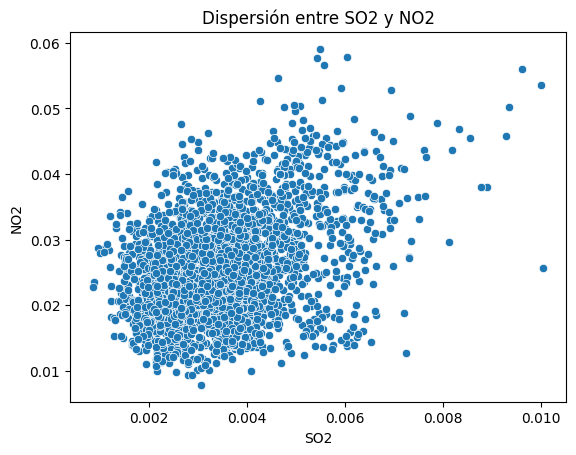

In [184]:
seaborn.scatterplot(contam, x="SO2", y="NO2")
pyplot.title("Dispersión entre SO2 y NO2")
contam["SO2"].corr(contam["NO2"], method="spearman")

np.float64(0.29597821821676923)

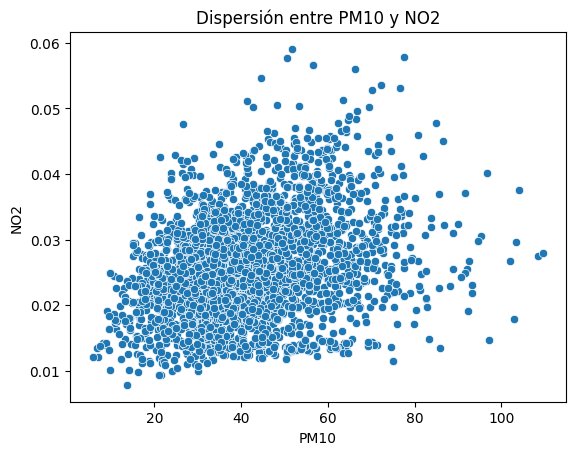

In [187]:
seaborn.scatterplot(contam, x="PM10", y="NO2")
pyplot.title("Dispersión entre PM10 y NO2")
contam["PM10"].corr(contam["NO2"], method="spearman")

**Test de Mann-Kendall**

* $H_0$ - No hay tendencia monótona (la serie es aleatoria)
* $H_a$ - Existe una tendencia nónotona (positiva o negativa)

$$
S = \sum_{j = 1}^{n - 1} \sum_{k = j + 1}^n sign(p_k - p_j)
$$

$$
Var(S) = ...
$$

$$
Z = \begin{cases}
\frac{S - 1}{Var(S)} \qquad S > 0 \\
0 \qquad S = 0 \\
\frac{S + 1}{Var(S)} \qquad S < 0 \\
\end{cases}
$$

In [201]:
import pymannkendall as kendall

reportes = []

for column in contam.columns:

    test = kendall.original_test(contam[column], alpha=0.05)
    reportes.append((column, test))

    reporte = pandas.DataFrame(
        {
            "Contaminante": column,
            "Trend": [test.trend],
            "Ha": [test.h],
            "p-value": [test.p],
            "Z": [test.z],
            "S": [test.s],
            "Var(S)": [test.var_s],
            "b0": [test.intercept],
            "b1": [test.slope],
            "tau": [test.Tau],
        },
        index=["Value"],
    ).T

    print(reporte, end="\n\n")

                          Value
Contaminante                 O3
Trend                increasing
Ha                         True
p-value                     0.0
Z                     17.591508
S                      984559.0
Var(S)        3132394657.666667
b0                     0.036618
b1                     0.000004
tau                    0.212721

                          Value
Contaminante               PM10
Trend                decreasing
Ha                         True
p-value                     0.0
Z                     -7.791406
S                     -436069.0
Var(S)        3132396636.333333
b0                    43.740424
b1                    -0.002505
tau                   -0.094216

                          Value
Contaminante               PM25
Trend                decreasing
Ha                         True
p-value                0.011176
Z                     -2.537141
S                     -141999.0
Var(S)        3132386463.666667
b0                    16.254297
b1    

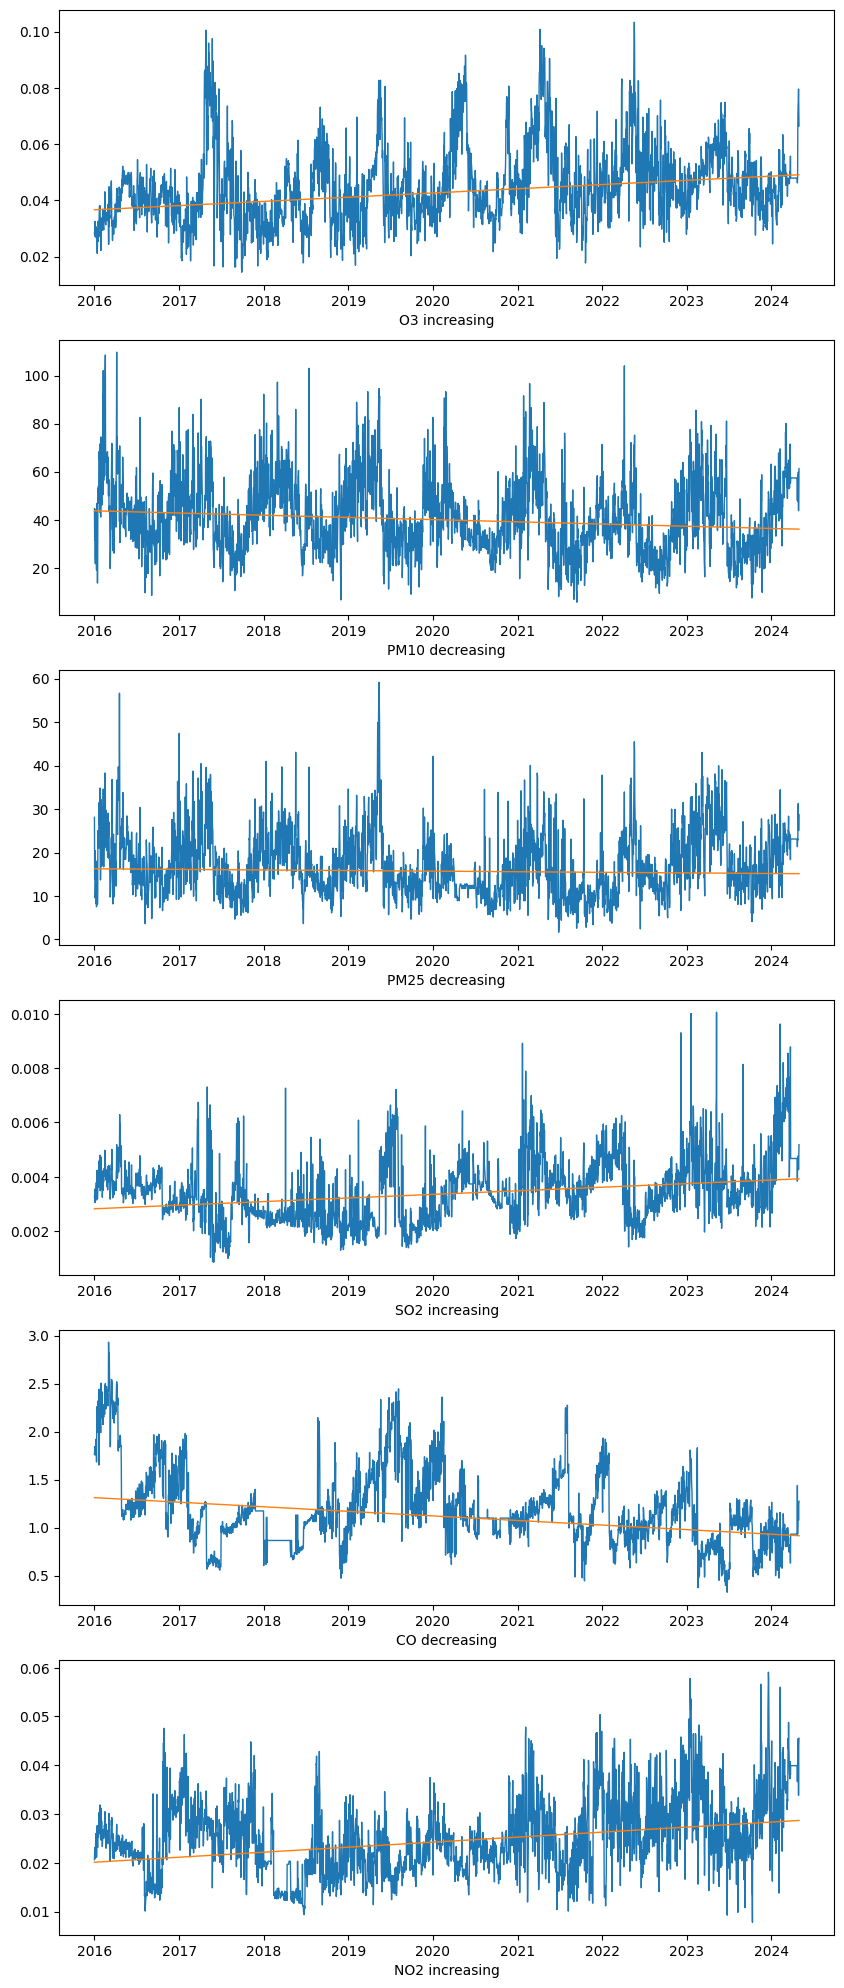

In [210]:
figure, axis = pyplot.subplots(len(reportes), 1, figsize=(10, 25))

for i, (column, reporte) in enumerate(reportes):
    points = [reporte.intercept + i * reporte.slope for i in range(contam[column].count())]
    y = pandas.Series(points, index=contam.index)
    axis[i].plot(contam.index, contam[column], lw=1)
    axis[i].plot(contam.index, points, lw=1)
    axis[i].set_xlabel(f"{column} {reporte.trend}")

**Innovative Trand Analysis (ITA Methodology)**

* **Pasado:** $x_1 = $x_0, \ldots, x_{n / 2 - 1}$
* **Presente:** $x_2 = $x_{n / 2}, \ldots, x_{n - 1}$

**Interpretación gráfica**

* **Puntos por encima de la diagonal**: señal de tendencia creciente.
* **Puntos por debajo**: tendencia decreciente.
* **Puntos dispersos simétricamente**: sin tendencia global.
* **Patrones específicos (como dispersión en extremos)**: pueden indicar tendencias parciales.

Sen Z. 2012. Innovative trend analysis methodology, J Hydrol Eng, 17 (9), pp. 1042–1046. https://doi.org/10.1061/(ASCE)HE.1943-5584.0000556

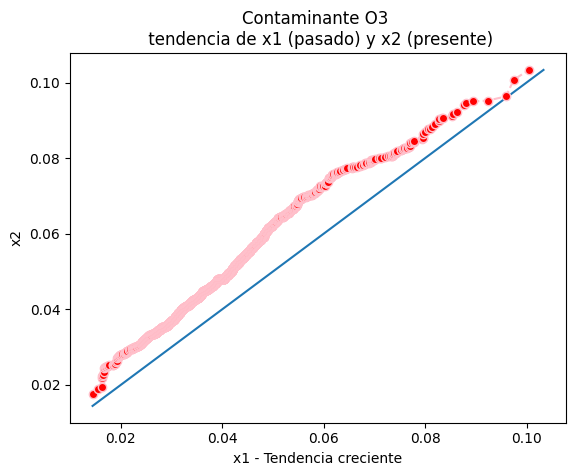

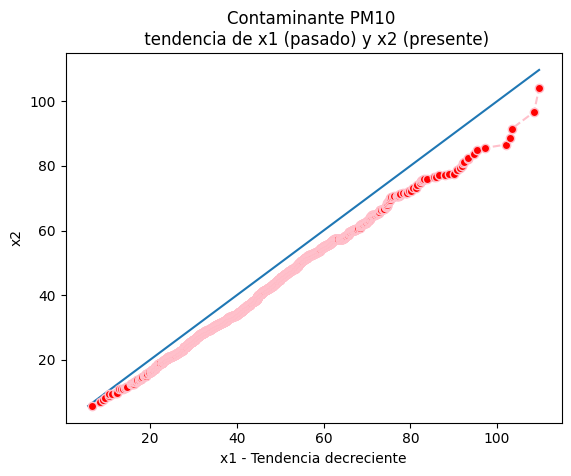

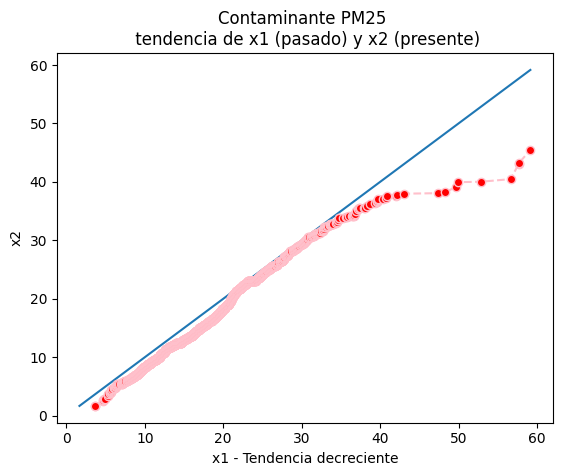

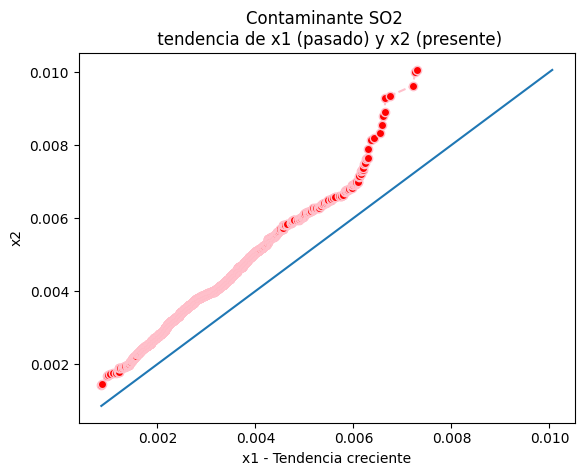

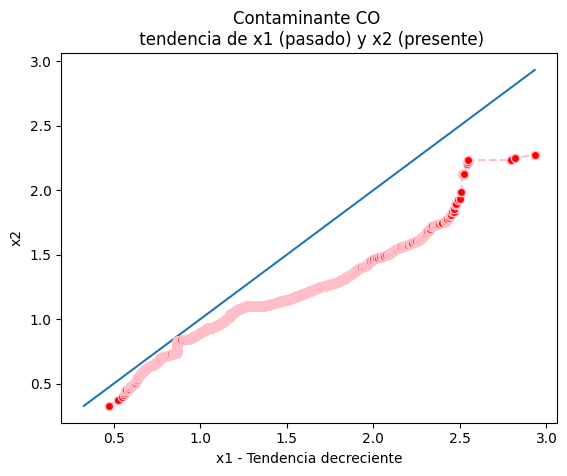

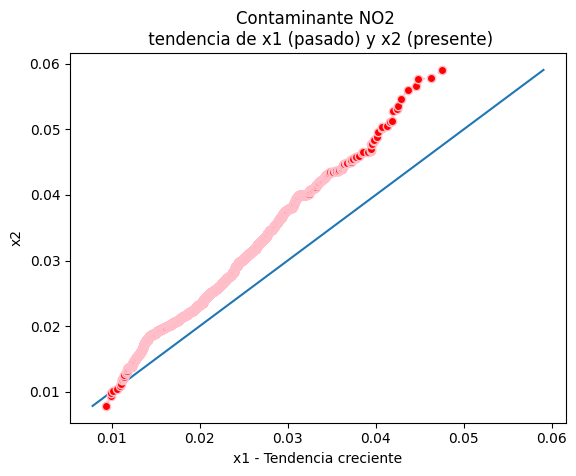

In [222]:
import numpy
import matplotlib.pyplot as pyplot

for column in contam.columns:

    x = contam[column]

    n = x.count()

    m = int(n / 2)

    x1 = x[:m]
    x2 = x[m:2*m]

    xp = numpy.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()))

    b = numpy.array(sorted(x2))
    a = numpy.array(sorted(x1))

    tendenciaArriba = (b / a).mean() > 1
    tendenciaAbajo = (b / a).mean() < 1

    tendencia = "Sin tendencia"
    
    if tendenciaArriba:
        tendencia = "Tendencia creciente"
    elif tendenciaAbajo:
        tendencia = "Tendencia decreciente"

    pyplot.plot(xp, xp)
    pyplot.plot(sorted(x1), sorted(x2), 
                marker="o", linestyle="--", 
                color="pink", markerfacecolor="red")
    pyplot.xlabel(f"x1 - {tendencia}")
    pyplot.ylabel("x2")
    pyplot.title(f"Contaminante {column} \n tendencia de x1 (pasado) y x2 (presente)")
    pyplot.show()

